### Solución Desafío - Naive Bayes

**Nombre alumno:** Julio Valdés

Profesor: Gabriel Tamayo L.

Generación: G5

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.

### Descripción

* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. 
* Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto. Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
* Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

### Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump.
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

dfs = []
for archivo in glob.glob(os.getcwd() + '/dump/*.csv'):
    df_archivo = pd.read_csv(archivo)
    dfs.append(df_archivo)

df = pd.concat(dfs).drop('Unnamed: 0', axis=1)
df.rename(columns = {'0': 'artista', '1': 'genero', '2': 'cancion', '3': 'letra'}, inplace = True)
df.head()

,artista,genero,cancion,letra
0,Public Enemy,hiphop,You're Gonna Get Yours,"(Flavor Flav) \n Oh-oh Chuck, they out to get ..."
1,Public Enemy,hiphop,Sophisticated Bitch,"That woman in the corner, cold playin' the rol..."
2,Public Enemy,hiphop,Miuzi Weighs A Ton,"Yo Chuck, run a power move on them \n (Yeah) \..."
3,Public Enemy,hiphop,Timebomb,"(Intro - Flavor Flav) \n Hey, Chuck, we got so..."
4,Public Enemy,hiphop,Too Much Posse,(Intro - Flavor Flav) \n What do you got to sa...


### Ejercicio 2: Descripción de los datos
* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    * La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    * La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
* Comente sobre las principales tendencias.

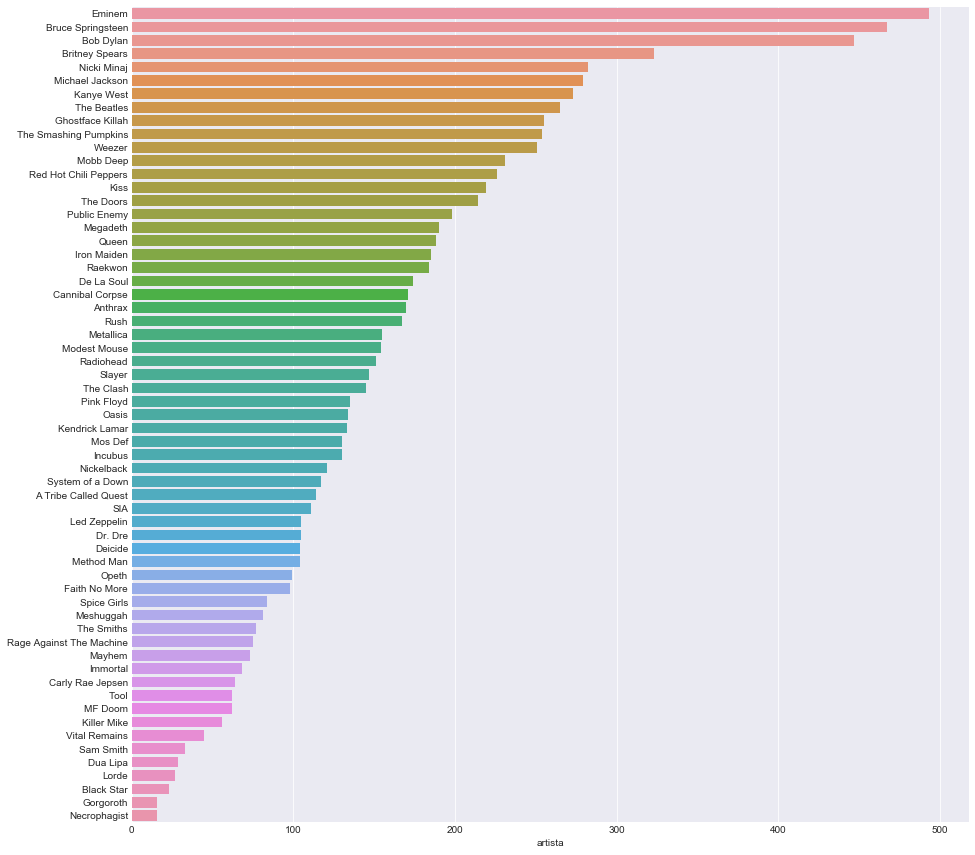

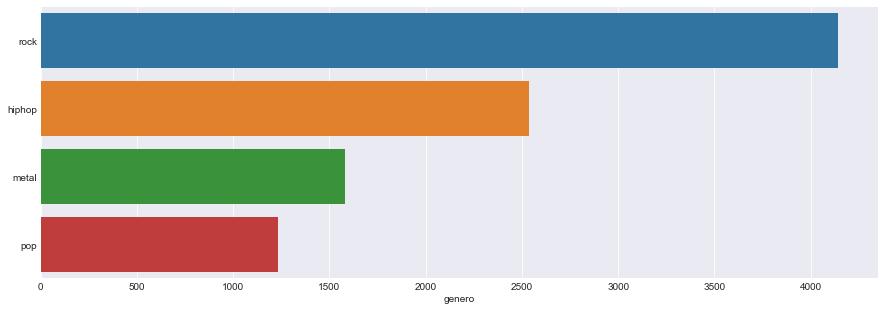

In [114]:
artista_count = df['artista'].value_counts(ascending = False)
plt.figure(figsize=(15, 15))
sns.barplot(artista_count, artista_count.index)
genero_count = df['genero'].value_counts(ascending = False)
plt.figure(figsize=(15, 5))
sns.barplot(genero_count, genero_count.index)

#### Comentarios:
* Los tres artistas con mayor cantidad de canciones registradas son Eminem, Bruce Springsteen y Bob Dylan.
* Los tres artistas con menor cantidad de canciones registradas son Black Star, Gorgoroth y Necrophagist.
* El genero con mayor cantidad de canciones registradas es el rock, seguida por el hiphop, metal y pop.

### Ejercicio 3: Matriz de ocurrencias

* Digresión: Tokenización de Textos
    * Para poder trabajar con textos, debemos pasarlos a una matriz dispersa, donde cada fila representará una entrada (en este caso, una canción), y cada columna representará una palabra (token). Este es el proceso de tokenización: Identificar la ocurrencia de una palabra específica dentro de un conjunto de textos (corpus). El tokenizador más simple sklearn.feature_extraction.text.CountVectorizer genera una colección de textos a una matriz que representa la frecuencia dentro del texto de una palabra específica. El tokenizador funciona de la siguiente manera:
    
```python

from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
```
    
    
* Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn . Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?
* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
* Genere una función que replique el procedimiento para cada uno de los géneros.
* Comente sobre las principales características de cada género en cuanto a sus palabras.

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
cv = CountVectorizer(stop_words = 'english', max_features= 100)
cv_fit = cv.fit_transform(df['letra'])
words = cv.get_feature_names()
words_freq = cv_fit.toarray().sum(axis=0)
pd.DataFrame(words_freq, index = words, columns = ['Cantidad']).sort_values(by=['Cantidad'], ascending=False).head()

,Cantidad
like,19629
don,17398
know,14962
got,14171
just,13978


In [117]:
def top100(df, genero):
    cv = CountVectorizer(stop_words = 'english', max_features= 100)
    cv_fit = cv.fit_transform(df[df['genero'] == genero]['letra'])
    words = cv.get_feature_names()
    words_freq = cv_fit.toarray().sum(axis=0)
    return pd.DataFrame(words_freq, index = words, columns = ['Cantidad']).sort_values(by=['Cantidad'], ascending=False)

In [118]:
top100(df, 'rock').head()

,Cantidad
don,5284
love,5114
know,4702
oh,4258
yeah,4157


In [119]:
top100(df, 'hiphop').head()

,Cantidad
like,12055
got,7613
don,7604
know,6535
just,6272


In [120]:
top100(df, 'metal').head()

,Cantidad
life,1233
don,1181
death,1139
time,1096
ll,1069


In [121]:
top100(df, 'pop').head()

,Cantidad
don,3329
like,2995
love,2914
oh,2737
know,2677


#### Comentarios
* La palabra "don" está dentro de las cinco más repetidas en todos los géneros
* La palabra "love" está dentro de las cinco más repetidas en el rock y pop
* La palabra "know" está dentro de las cinco más repetidas en el rock, hiphop y pop
* Las palabras "life" y "death" están dentro de las cinco más repetidas en el metal

### Ejercicio 4: Entrenamiento del Modelo
* Digresión: sklearn Pipelines
    * La clase Pipeline del módulo sklearn.pipeline permite concatenar múltiples pasos de procesamiento y preprocesamiento en un estimador generado por algún método de scikitlearn . En sí, la clase cuenta con los métodos clásicos fit , predict y score y presenta un comportamiento idéntico a los demás objetos de scikit-learn . Uno de los usos más comunes es para concatenar pasos de preprocesamiento con un modelo.
    
* Componentes de un Pipeline
   * Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de datos, deseo Estandarlizarlo, posteriormente extraer sus principales componentes y finalmente aplicar un modelo de regresión lineal. Este flujo se puede reexpresar como:
       
```python
pipeline_model = Pipeline([('scale', StandardScaler()),
                            ('pca', RandomizedPCA(n_components=3)),
                            ('model', LinearRegression())])
```
Algunos de los elementos a considerar:
1. Cada paso se considera como una tupla, donde se declara el nombre del paso y la función
a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por lo que
asociamos el método StandardScaler con el string scale .
2. Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso
representa el orden de ejecución.
Posteriormente el objeto creado puede utilizarse con los siguientes métodos

```python
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(X_test)
```

* Importe MultinomialNB , train_test_split , Pipeline , confusion_matrix y classification_report.
* Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
* Monte el modelo dentro de un Pipeline , donde el primer paso es implementar CountVectorizer y el segundo sea ejecutar el clasificador MultinomialNB.
* A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?

```python
['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]
```

* Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [127]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [128]:
label_encoder = LabelEncoder()
df['genero_bin'] = label_encoder.fit_transform(df['genero'])
X_train, X_test, y_train, y_test = train_test_split(df['letra'], df['genero_bin'], random_state=11238, test_size = 0.4)

In [146]:
pipeline_model = Pipeline([
    ('cv', CountVectorizer(stop_words='english', max_features=100)), 
    ('multinomial', MultinomialNB())
])
pipeline_model.fit(X_train, y_train)

X_test_new = ['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]
y_hat_new = pipeline_model.predict(X_test_new)

genero_text = []
for i in range(4):
    genero_text.append(df[df['genero_bin'] == i]['genero'].unique()[0])
    
for key, value in enumerate(X_test_new):
    print("{}: {}".format(value, genero_text[y_hat_new[key]]))


I got a place in the underworld: rock
As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara: rock
Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie: hiphop
Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way: hiphop
Sexual violence doesn’t start and end with rape It starts in our books and behind our school gatesTake it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving: rock


In [147]:
y_hat = pipeline_model.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1033
           1       0.58      0.73      0.65       639
           2       0.36      0.33      0.35       472
           3       0.73      0.67      0.70      1652

   micro avg       0.67      0.67      0.67      3796
   macro avg       0.62      0.63      0.62      3796
weighted avg       0.68      0.67      0.67      3796



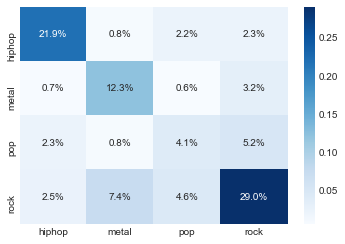

In [152]:
cnf = confusion_matrix(y_test, y_hat)/len(y_test)
sns.heatmap(cnf, xticklabels = genero_text, yticklabels=genero_text, annot=True, fmt=".1%", cbar=True, cmap='Blues')

#### Comentarios
* Al analizar las métricas se observa que el modelo presenta buenos indicadores en general. Los peores resultados se obtienen en la clase 2 que corresponde al 'pop'. En esto puede influir que se cuenta con la menor cantidad de datos.
* Al analizar la matriz de confusión se confirma lo analizado en las métricas, siendo sólo de un 4,1% el porcentaje de casos donde se predijo 'pop' de manera correcta.

### Ejercicio 5: Mejora del Modelo
* Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.
* Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.
* Comente sobre el desempeño general de éste.

#### Para mejorar el desempeño del modelo en la categoría 'pop' se utilizará una BD con mayor cantidad de registros en esta categoría.

In [156]:
dfs_plus = []
for archivo in glob.glob(os.getcwd() + '/dump_plus_pop/*.csv'):
    df_archivo = pd.read_csv(archivo)
    dfs_plus.append(df_archivo)

df_plus = pd.concat(dfs_plus).drop('Unnamed: 0', axis=1)
df_plus.rename(columns = {'0': 'artista', '1': 'genero', '2': 'cancion', '3': 'letra'}, inplace = True)
df_plus['genero'].value_counts('%')

rock      0.383191
pop       0.235746
hiphop    0.234635
metal     0.146427
Name: genero, dtype: float64

In [163]:
df_plus['genero_bin'] = label_encoder.fit_transform(df_plus['genero'])
X_train_plus, X_test_plus, y_train_plus, y_test_plus = train_test_split(df_plus['letra'], df_plus['genero_bin'], random_state=11238, test_size = 0.4)
pipeline_model_plus = Pipeline([
    ('cv', CountVectorizer(stop_words='english', max_features=100)), 
    ('multinomial', MultinomialNB())
])
pipeline_model_plus.fit(X_train_plus, y_train_plus)
y_hat_plus = pipeline_model_plus.predict(X_test_plus)
print(classification_report(y_test_plus, y_hat_plus))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1024
           1       0.51      0.71      0.60       661
           2       0.53      0.48      0.50       963
           3       0.64      0.56      0.60      1674

   micro avg       0.62      0.62      0.62      4322
   macro avg       0.61      0.63      0.62      4322
weighted avg       0.62      0.62      0.62      4322



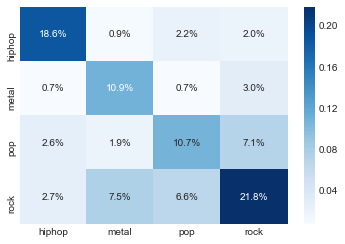

In [158]:
cnf = confusion_matrix(y_test_plus, y_hat_plus)/len(y_test_plus)
sns.heatmap(cnf, xticklabels = genero_text, yticklabels=genero_text, annot=True, fmt=".1%", cbar=True, cmap='Blues')

#### Comentarios
* Al analizar las métricas se observa que el modelo presenta buenos indicadores en general. En relación al modelo anterior se observa que mejoraron los indicadores para la clase 'pop' al aumentar la cantidad de muestras.
* Al analizar la matriz de confusión se confirma lo analizado en las métricas, aumentando desde un 4,1% a un 10,7% el porcentaje de casos donde se predijo 'pop' de manera correcta.